## With All Channels

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from pathlib import Path

os.chdir("..")
project_root = Path.cwd()

data_path = project_root / "datasets" / "features_dataset_plus.csv"

from scripts.train_and_test import *

X_train_scaled, X_test_scaled, y_train, y_test, n_features, label_encoders, scaler = load_multilabel_data(data_path)

X_all = np.vstack([X_train_scaled, X_test_scaled])
y_all = np.vstack([y_train, y_test])

results = train_multilabel_classifiers(X_train_scaled, X_test_scaled, y_train, y_test)

Data shape: (6981, 85)
Number of labels: 2
  material: ['Al' 'Cu' 'FEP' 'PE' 'PET' 'PI' 'Paper']
  location: ['bottom' 'center' 'left' 'right' 'top']

Train set: 5584 samples
Test set: 1397 samples

Multilabel SVM
  Exact Accuracy: 0.6001 (+/- 0.0124)
  Micro-avg Precision: 0.7585
  Micro-avg Recall:    0.7585
  Micro-avg F1:        0.7585

Multilabel KNN
  Exact Accuracy: 0.8515 (+/- 0.0118)
  Micro-avg Precision: 0.9016
  Micro-avg Recall:    0.9016
  Micro-avg F1:        0.9016

Multilabel Random Forest
  Exact Accuracy: 0.9825 (+/- 0.0053)
  Micro-avg Precision: 0.9890
  Micro-avg Recall:    0.9890
  Micro-avg F1:        0.9890

Multilabel Decision Tree
  Exact Accuracy: 0.8920 (+/- 0.0074)
  Micro-avg Precision: 0.9409
  Micro-avg Recall:    0.9409
  Micro-avg F1:        0.9409



In [2]:
def plot_cms(results, label_encoders, label_names):
    for name, metrics in results.items():
        confusion_matrices = metrics.get("confusion_matrices")
        classifier_name = name.replace("Multilabel ", "")
        
        for i, label in enumerate(label_names):
            cm = confusion_matrices.get(label)
            
            label_encoder = label_encoders[i]
            class_names = label_encoder.classes_
            
            # Convert confusion matrix to proportions
            cm_prop = cm.astype(np.float64)
            row_sums = cm_prop.sum(axis=1, keepdims=True)
            # Avoid division by zero
            cm_prop = np.divide(cm_prop, row_sums, where=row_sums != 0)
            
            plt.figure(figsize=(5, 4))
            class_names = [str(c).capitalize() for c in class_names]
            sns.heatmap(
                cm_prop, 
                annot=True, 
                fmt=".2f", 
                cmap="Blues", 
                xticklabels=class_names, 
                yticklabels=class_names, 
                vmin=0, 
                vmax=1)
            
            per_label_acc = metrics.get("per_label_accuracy", {})
            label_acc = per_label_acc.get(label, None)
            
            plt.title(f"{classifier_name} ({label.capitalize()}) - {label_acc:.4f}")
            
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.tight_layout()
            plt.show()

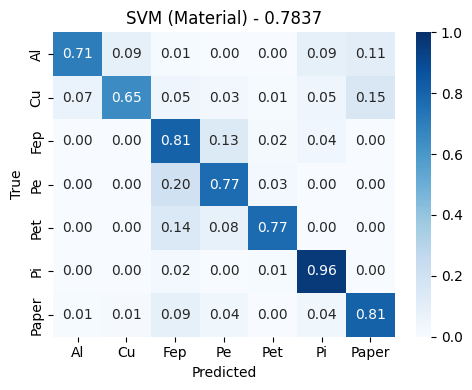

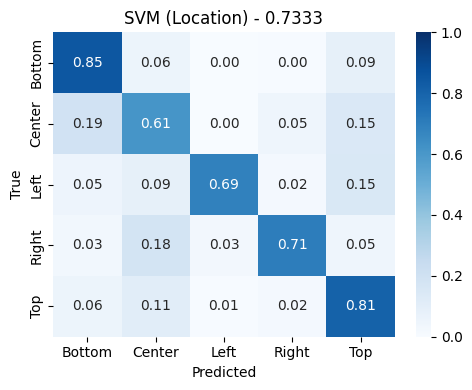

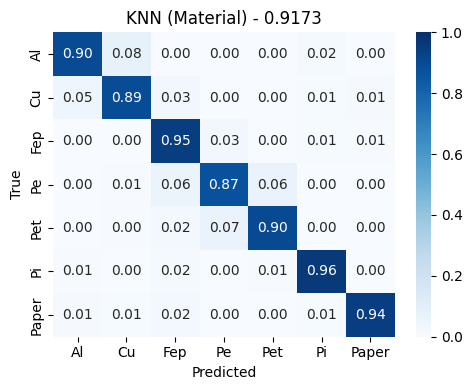

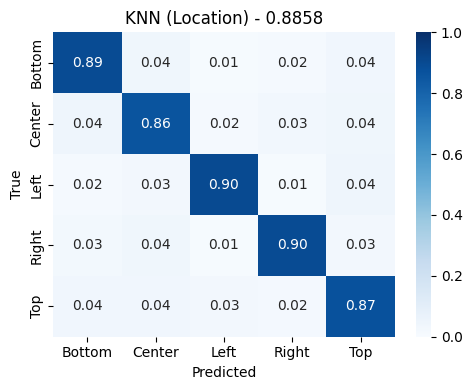

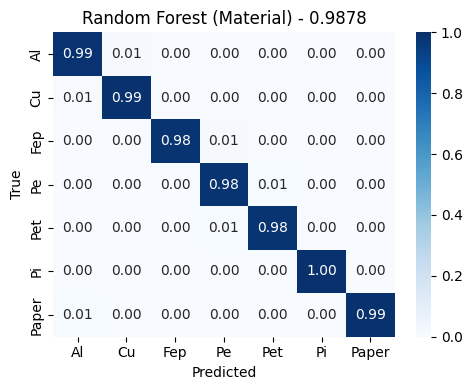

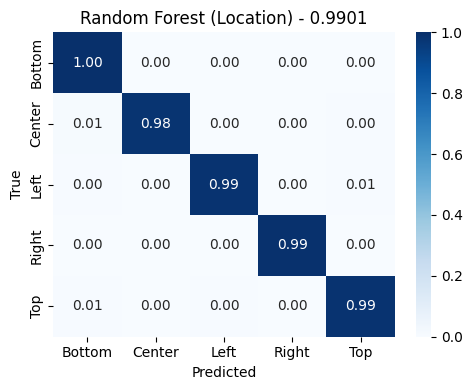

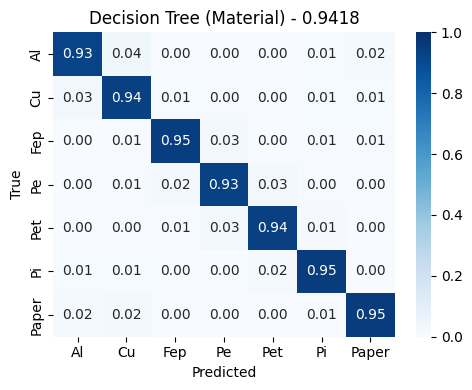

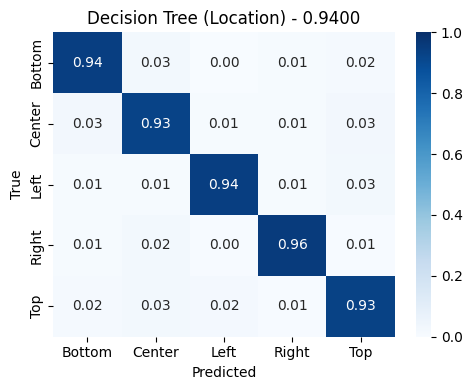

In [3]:
label_names=['material', 'location']
plot_cms(results, label_encoders, label_names)

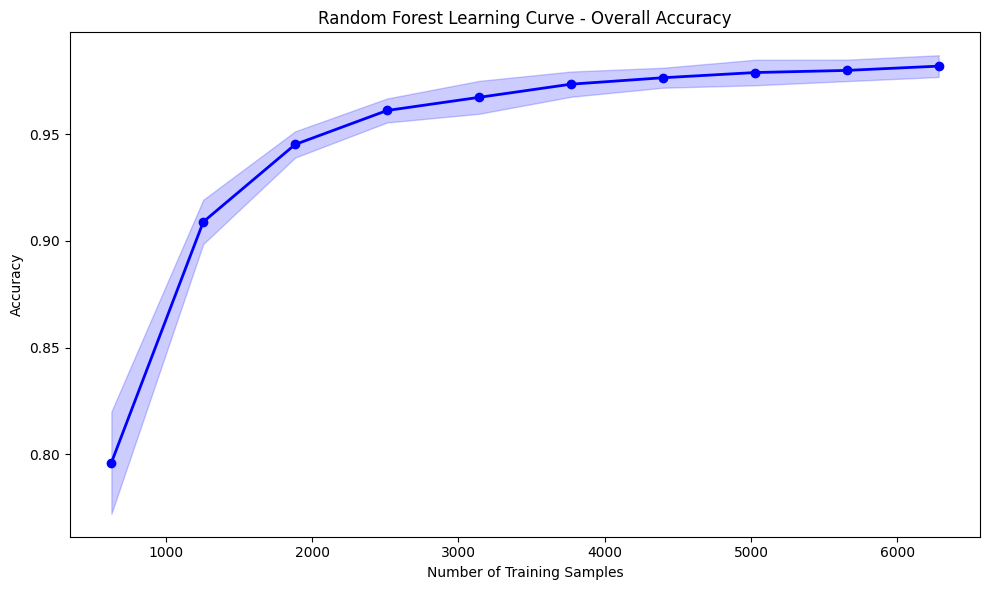

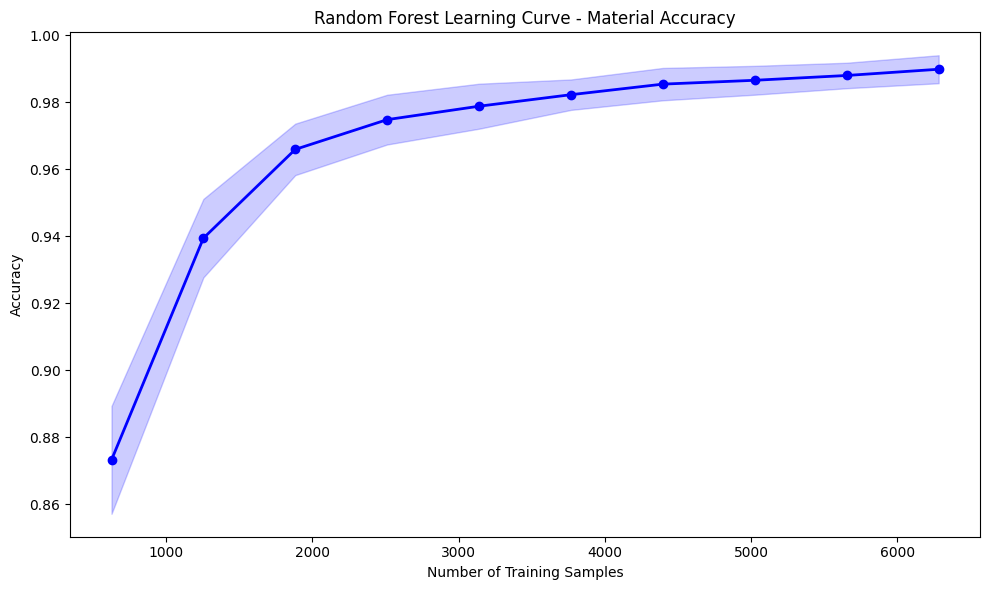

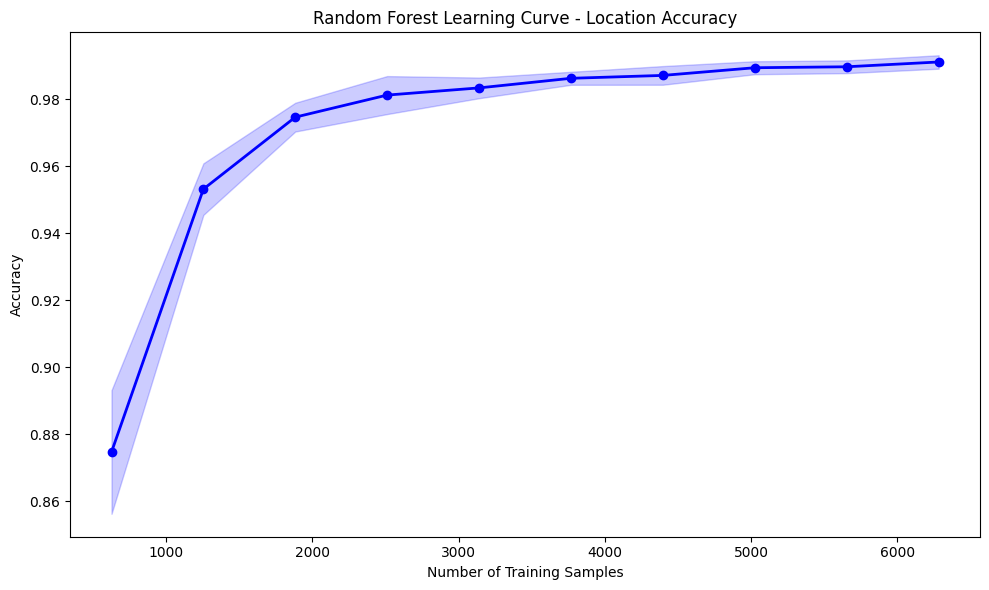

In [4]:
plot_random_forest_lc(X_all, y_all, label_names, title="Random Forest Learning Curve")

## Recall, Precision, F1, and Accuracy of All Models

In [5]:
def plot_all_metrics(results):
    model_names = list(results.keys())
    display_names = [name.replace("Multilabel ", "") for name in model_names]
    
    accuracies = [results[name]["accuracy"] for name in model_names]
    accuracy_stds = [results[name]["accuracy_std"] for name in model_names]
    precisions = [results[name]["overall_precision"] for name in model_names]
    recalls = [results[name]["overall_recall"] for name in model_names]
    f1_scores = [results[name]["overall_f1"] for name in model_names]
        
    metrics_data = [
        ("Exact Match Accuracy", accuracies, accuracy_stds, "Accuracy"),
        ("Micro-averaged F1 Score", f1_scores, None, "F1 Score"),
        ("Micro-averaged Recall", recalls, None, "Recall"),
        ("Micro-averaged Precision", precisions, None, "Precision")
    ]
    
    for title, values, errors, ylabel in metrics_data:
        plt.figure()
        bars = plt.bar(display_names, values, linewidth=1)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.ylim([0, 1])
        plt.xticks()
        
        for bar, value in zip(bars, values):
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height / 2,
                f"{height:.2f}",
                ha='center',
                va='center',
                color='black',
            )
        
        plt.tight_layout()
        plt.show()

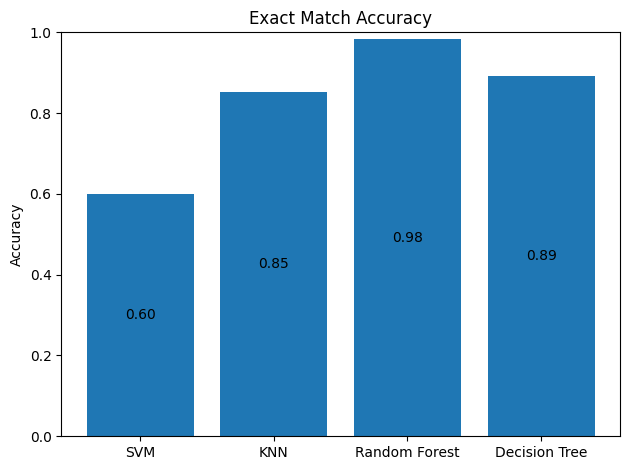

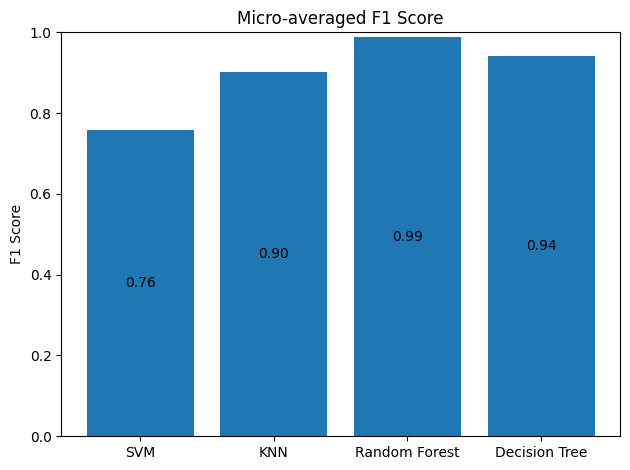

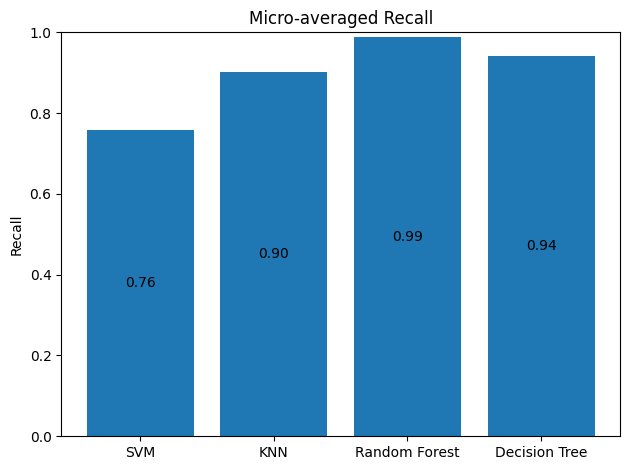

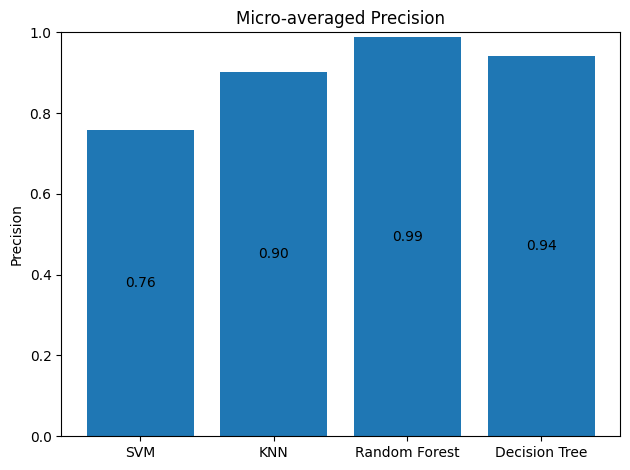

In [6]:
plot_all_metrics(results)